# 프로젝트의 방향성

 - 데이터 분석  
 가설 설정 -> 피쳐엔지니어링 -> 가설 여부가 맞는지 아닌지 정리

- 어플리케이션 만든팀  
사회적으로 필요해야함  
수요가 있는지 사업적 가치가 있는지 중요

- 딥러닝 모델을 구축  
시행착오 과정을 기록   
베스트 모델을 찾아야   
RAG  


----

# Lenet - 5

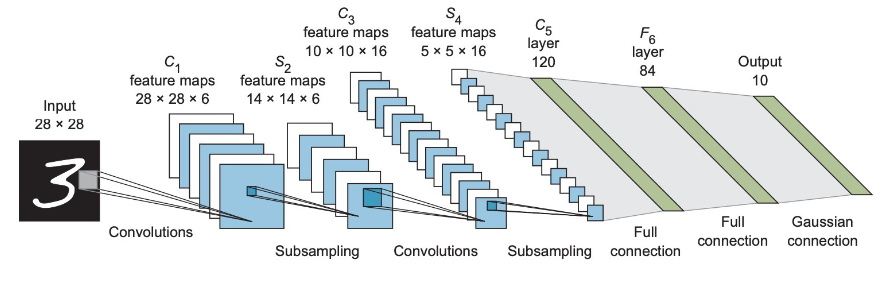

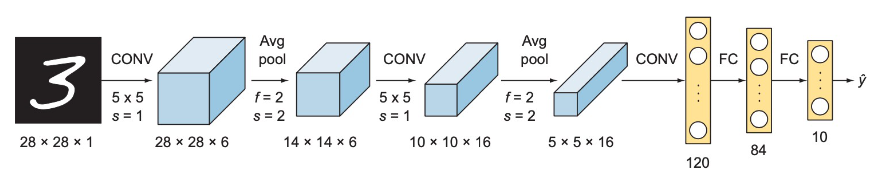

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [9]:
model  = Sequential([
    Conv2D(6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (28,28,1), padding = 'same' ),
    AveragePooling2D (pool_size=2 , strides = 2,  padding = 'valid' ),
    Conv2D(16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid' ),
    AveragePooling2D (pool_size=2 , strides = 2,  padding = 'valid' ),
    Conv2D(120, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid' ),
    Flatten(),
    Dense(84, activation = 'tanh'),
    Dense(10, activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

----

# AlexNet

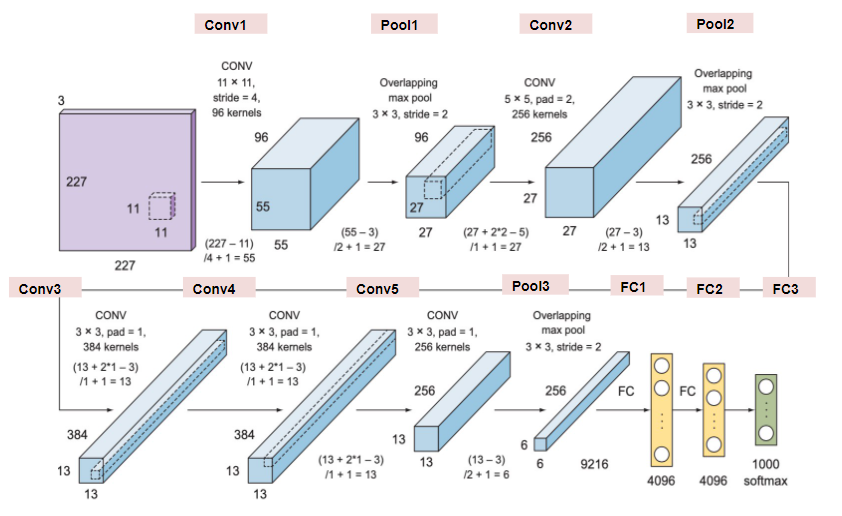

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

In [17]:
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=4,activation='relu', padding = 'valid'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (3,3), strides=(2,2), padding = 'valid' ),

    Conv2D(256, kernel_size=(5,5), strides=4,activation='relu', padding = 'same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size = (3,3), strides=(2,2), padding = 'valid' ),

    Conv2D(384, kernel_size=(3,3),activation='relu' , padding = 'same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(384, kernel_size=(3,3),activation='relu' , padding = 'same', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3,3),activation='relu' , padding = 'same', kernel_regularizer=l2(0.0005)),
    MaxPooling2D(pool_size = (3,3), strides=(2,2), padding = 'valid' ),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')

])